## Extracting Chess Squares with Perspective Transformation ( image --> fen format)

<br>
<font size="4">
Notebook version of perspective_transformation.py file. You can  understand better all the process by observing cell by cell.<br>  You can use this file for testing 
</font>
<br><br><br><br>

<br>

#### Necessary Libraries

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from ultralytics import YOLO
import  math
import ultralytics
import csv
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
from ultralytics import YOLO
from PIL import Image
import os
import chess
import chess.svg


<br>

#### Display Image

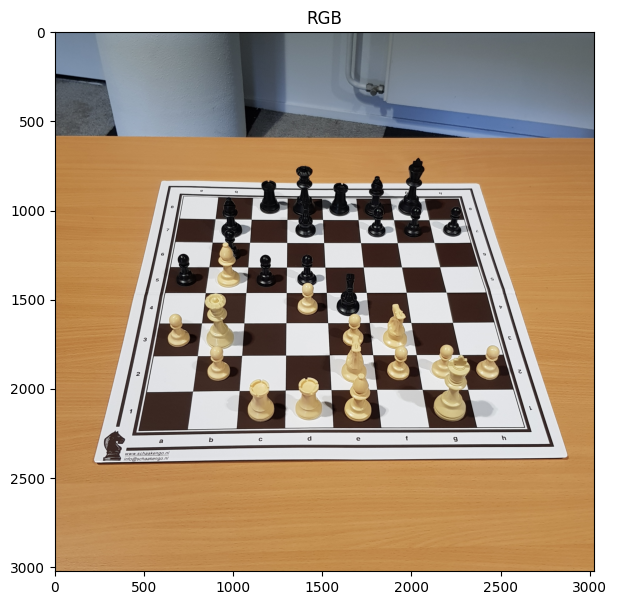

In [64]:
# Path of Image that you want to convert
image_path = r"test-images/test-5.jpeg"
image_path = r"D:\Projects\Uni\Chessy3D\data\ra2k\images\87\G087_IMG035.jpg"
# image_path = r"D:\Projects\Uni\Chessy3D\data\ra2k\images\42\G042_IMG000.jpg"
# image_path = r"C:\Users\Alessandro\Downloads\Dynamic-Chess-Board-Piece-Extraction-master\test-images\test-12.jpeg"


# read image and convert it to different color spaces 
image = cv2.imread(image_path)
#image = cv2.resize(image, (1000, 1000))

gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rgb_image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

original_size = 1000
scale_factor = image.shape[0] / original_size

plt.figure(figsize=(9,7))
plt.imshow(rgb_image)
plt.title("RGB");

<br>


## Processing Image 
####  OTSU Threshold , Canny , dilate , HoughLinesP

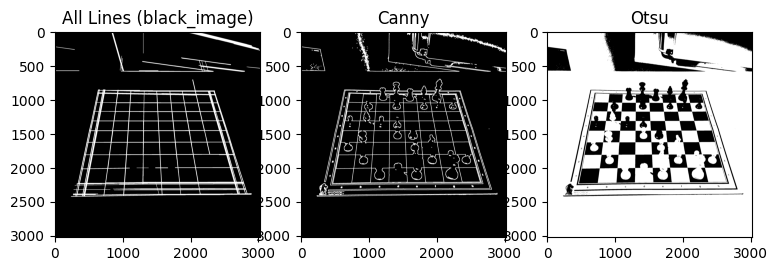

In [65]:

# OTSU threshold
blurred_image = cv2.GaussianBlur(gray_image,(5,5),0)
ret, otsu_binary = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Canny edge detection
canny_image = cv2.Canny(otsu_binary, 20, 255)

# Dilation
kernel = np.ones((7, 7), np.uint8)
dilation_image = cv2.dilate(canny_image, kernel, iterations=1)

# Hough Lines
lines = cv2.HoughLinesP(dilation_image, 1, np.pi / 180, threshold=500, minLineLength=150, maxLineGap=100)
# lines = link_and_merge_segments_array(lines[:, 0], image.shape[0]*image.shape[1])

# Create an image that contains only black pixels
black_image = np.zeros_like(dilation_image)

# Draw only lines that are output of HoughLinesP function to the "black_image"
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # draw only lines to the "black_image"
        cv2.line(black_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Dilation
kernel = np.ones((3, 3), np.uint8)
black_image = cv2.dilate(black_image, kernel, iterations=1)

plt.figure(figsize=(9,7))

plt.subplot(1, 3, 1)
plt.title("All Lines (black_image)")
plt.imshow(black_image,cmap="gray")


plt.subplot(1, 3, 2)
plt.title("Canny")
plt.imshow(dilation_image,cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Otsu")
plt.imshow(otsu_binary,cmap="gray")

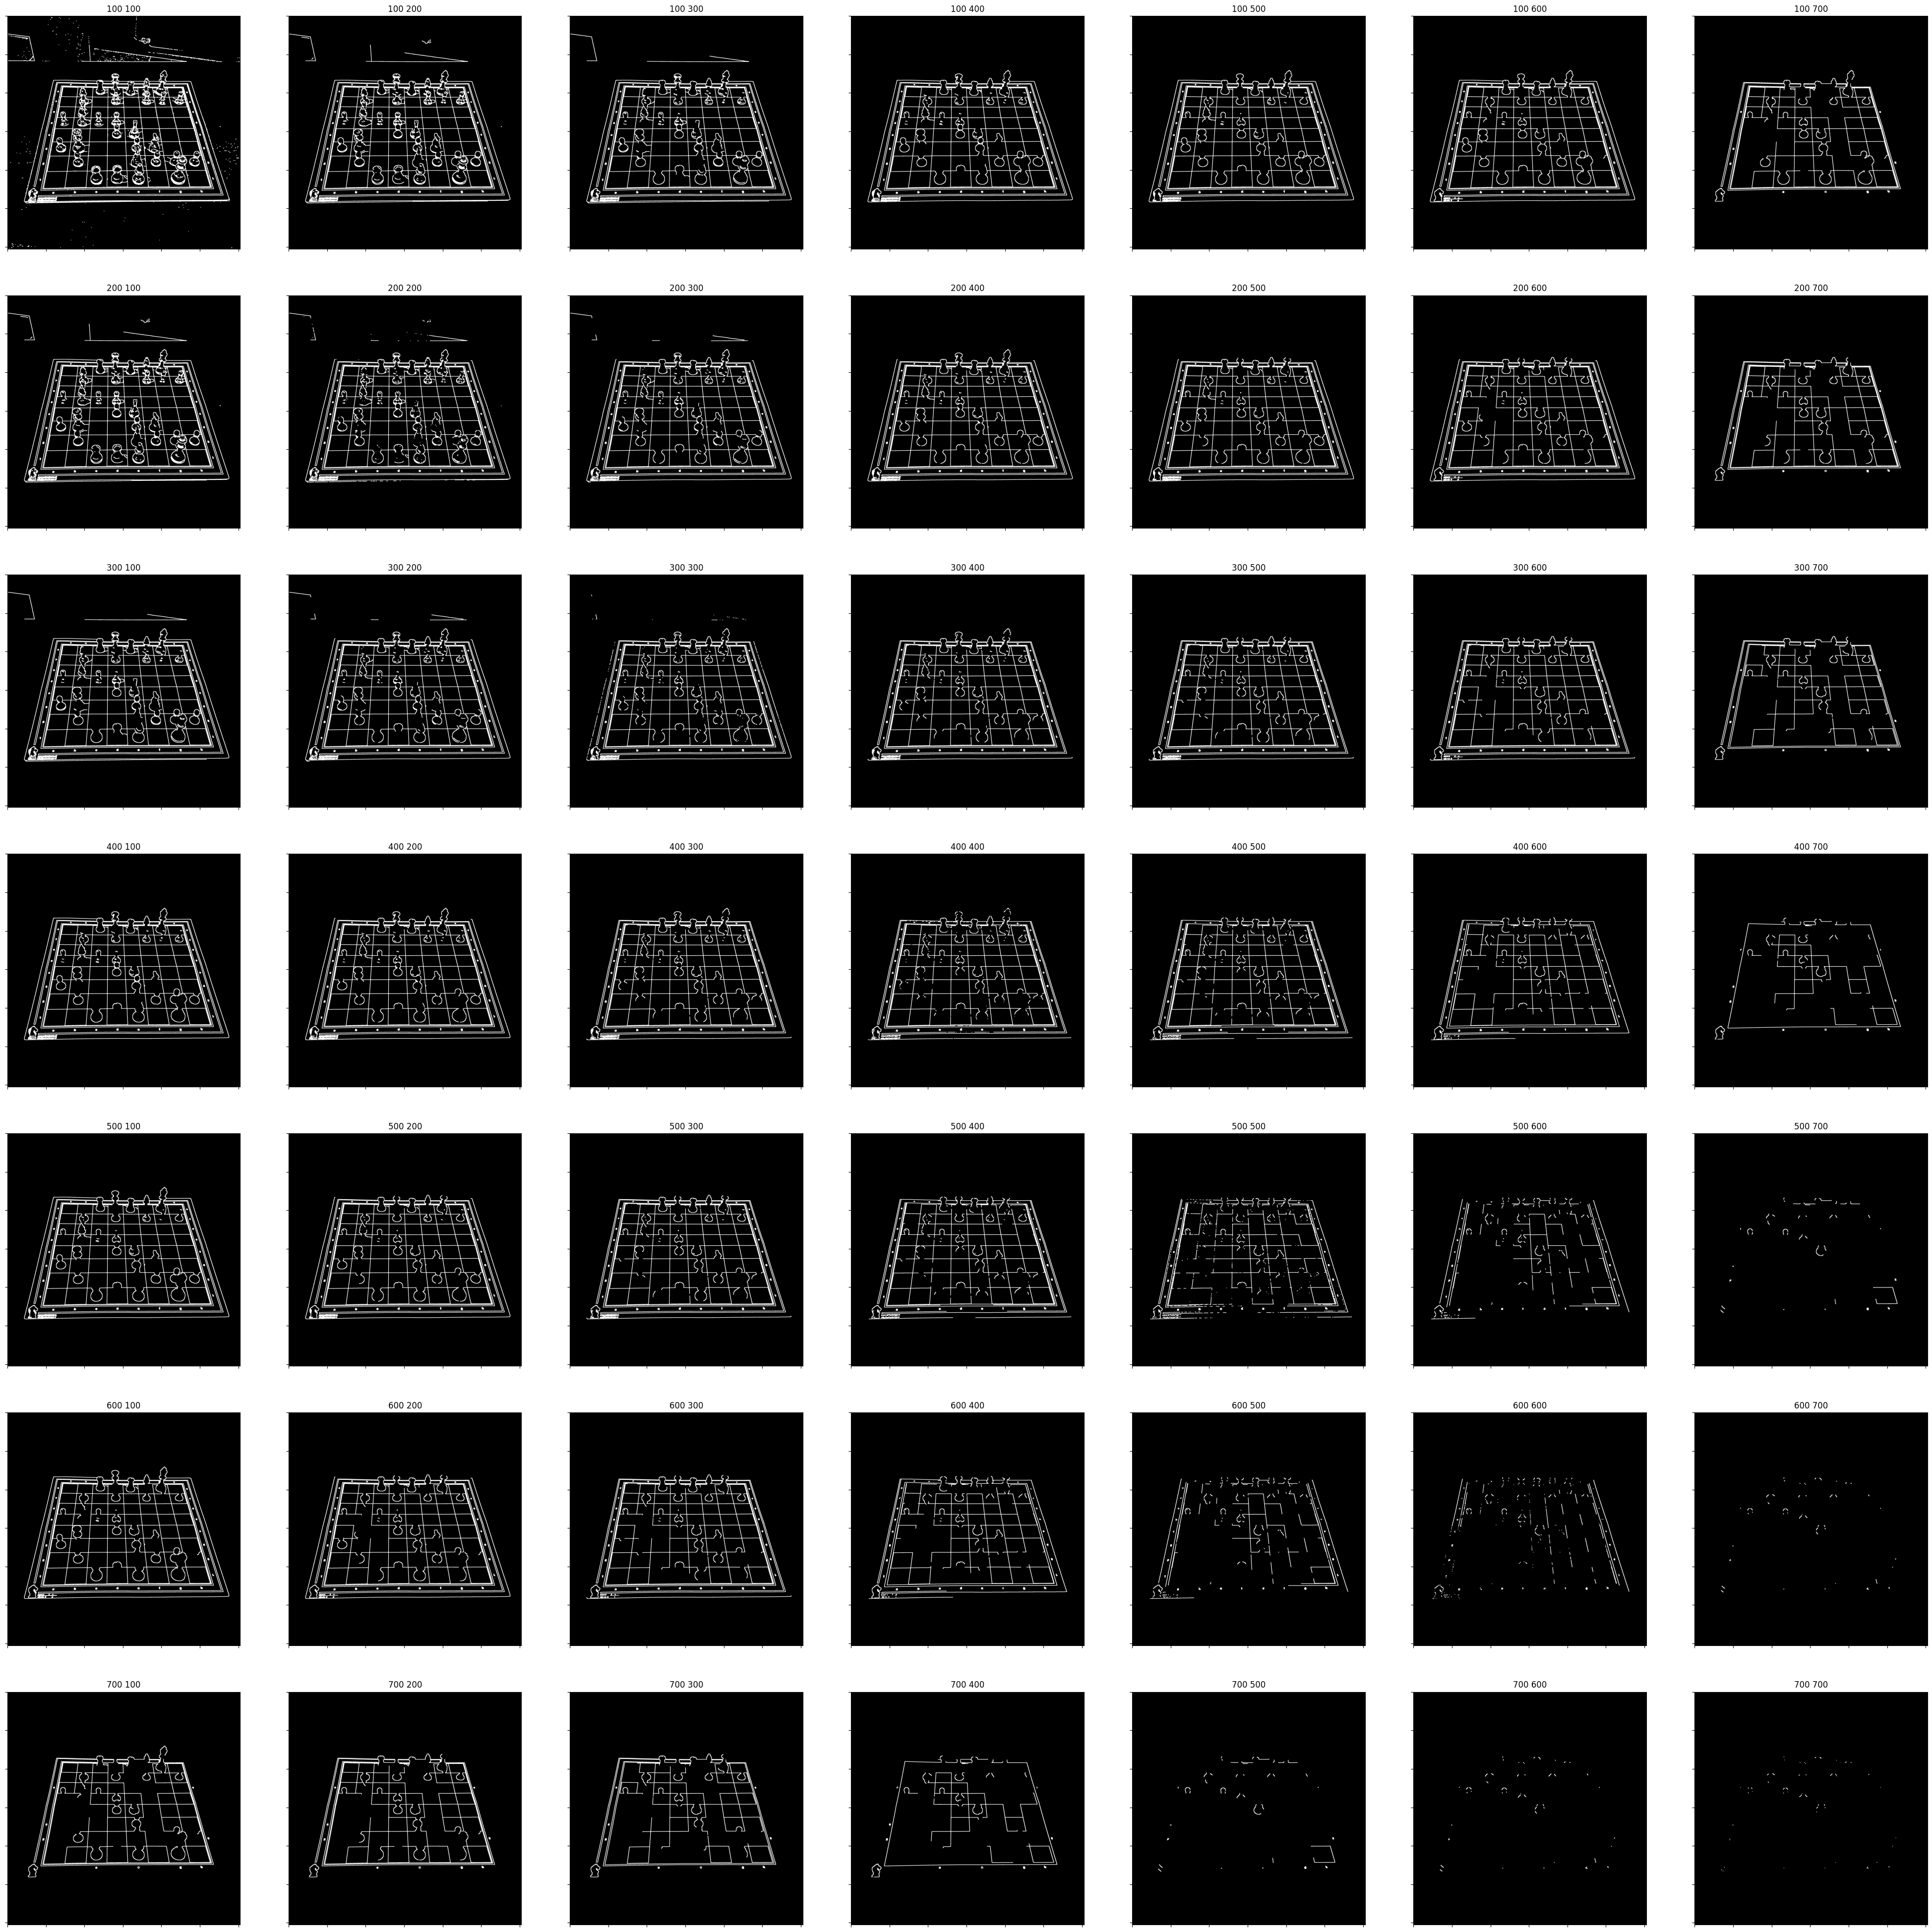

In [ ]:
import itertools

t1 = [100, 200, 300, 400, 500, 600, 700]
t2 = [100, 200, 300, 400, 500, 600, 700]

params = [x for x in itertools.product(t1, t2)]

rows = len(t1)
cols = len(t2)

can_kernel = np.ones((7, 7), np.uint8)
plt.figure(figsize=(50,50))
for idx, (t1, t2) in enumerate(params):
    can = cv2.Canny(blurred_image, t1, t2) # é stato modificato questo input per creare le varie immagini
    can = cv2.dilate(can, can_kernel, iterations=1)

    ax = plt.subplot(rows, cols, idx + 1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.title(f'{t1} {t2}')
    plt.imshow(can, cmap='gray')
